<a href="https://colab.research.google.com/github/hafnailmy-bip/pertemuan2/blob/main/PCD_Tugas_Model_Warna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload at least 3 images of the same object with different lighting


Saving Foto Tugas.jpeg to Foto Tugas.jpeg
===== IMAGE 1 =====
Conversion Time: 0.011882543563842773 seconds


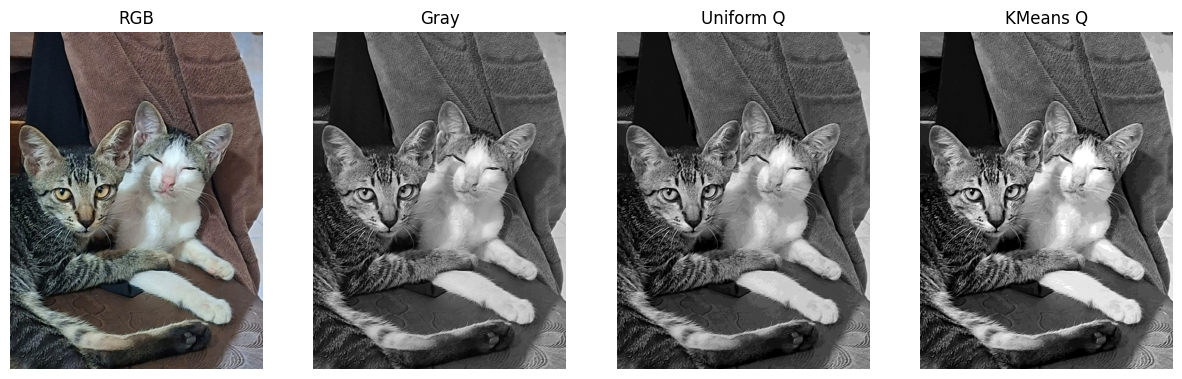

/tmp/ipython-input-431/3902143951.py:91: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(),256,[0,256])


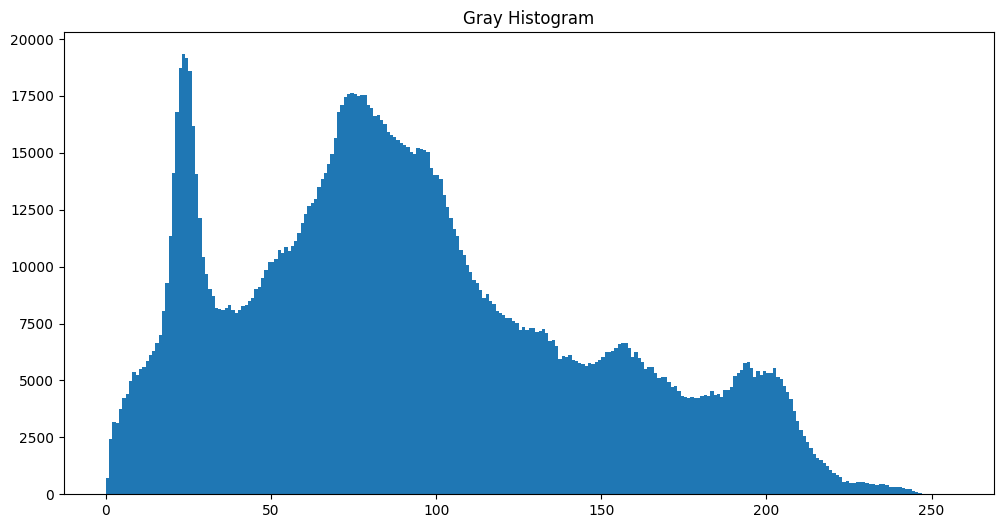

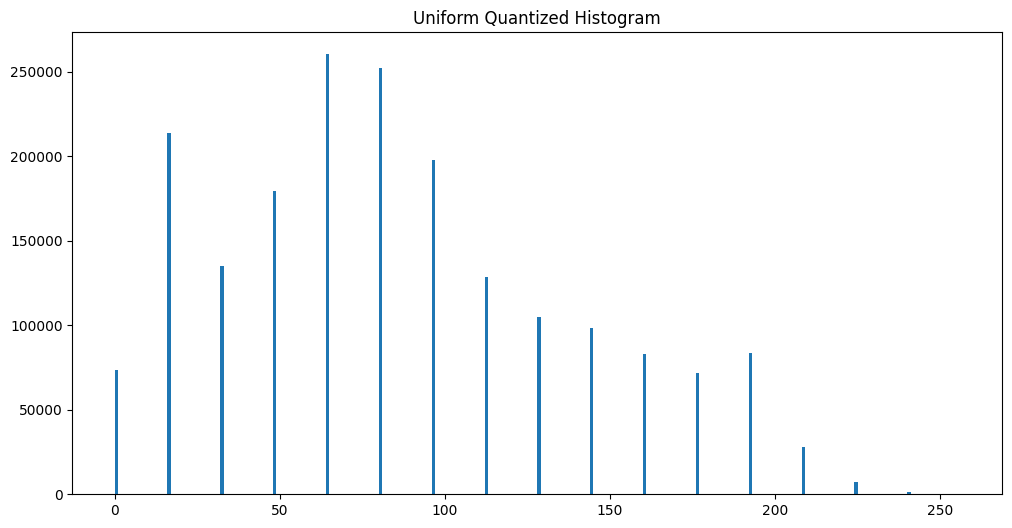

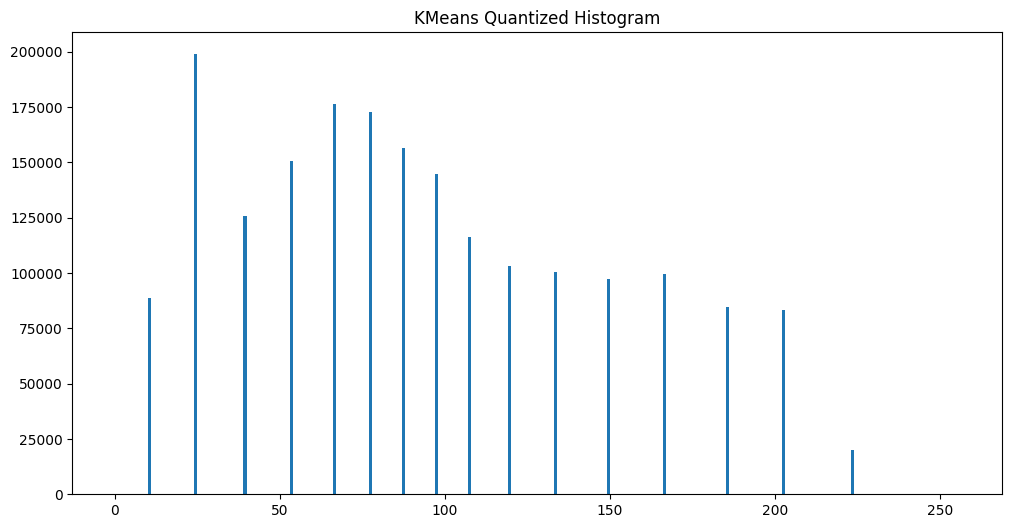

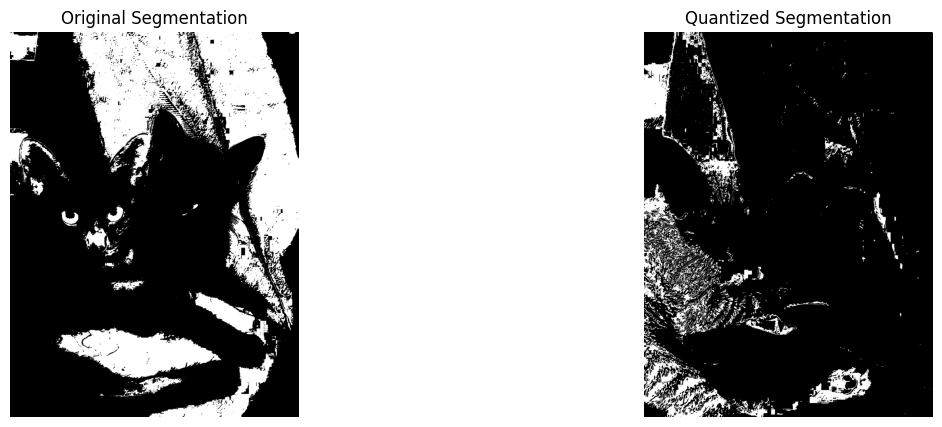

Memory Original (KB): 5625.0
Memory Quantized (KB): 5625.0
Compression Ratio: 1.0


DONE


In [2]:
# ============================================================
# Mini Project: Color Space Conversion & Quantization for Object Detection
# Compatible with Google Colab
# ============================================================

# =============================
# 1. Install & Import Libraries
# =============================
!pip -q install opencv-python scikit-learn

import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from google.colab import files

plt.rcParams['figure.figsize'] = (12,6)

# =============================
# 2. Upload Images (min 3 images with different lighting)
# =============================
print("Upload at least 3 images of the same object with different lighting")
uploaded = files.upload()

image_paths = list(uploaded.keys())
images = [cv2.imread(p) for p in image_paths]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

# =============================
# Utility Functions
# =============================

def show_images(img_list, titles):
    plt.figure(figsize=(15,5))
    for i,(img,title) in enumerate(zip(img_list,titles)):
        plt.subplot(1,len(img_list),i+1)
        plt.imshow(img, cmap='gray' if len(img.shape)==2 else None)
        plt.title(title)
        plt.axis('off')
    plt.show()


def memory_size(img):
    return img.nbytes/1024  # KB


def compression_ratio(original, quantized):
    return memory_size(original)/memory_size(quantized)

# =============================
# 3. Color Space Conversions
# =============================

def convert_color_spaces(img):
    start=time.time()
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    lab=cv2.cvtColor(img,cv2.COLOR_RGB2LAB)
    t=time.time()-start
    return gray,hsv,lab,t

# =============================
# 4. Uniform Quantization
# =============================

def uniform_quantization(img,levels=16):
    step=256//levels
    quant=(img//step)*step
    return quant.astype(np.uint8)

# =============================
# 5. Non-uniform Quantization (KMeans Histogram Clustering)
# =============================

def kmeans_quantization(img,k=16):
    Z=img.reshape((-1,1)) if len(img.shape)==2 else img.reshape((-1,3))
    Z=np.float32(Z)
    kmeans=KMeans(n_clusters=k,n_init=3,random_state=0).fit(Z)
    centers=np.uint8(kmeans.cluster_centers_)
    res=centers[kmeans.labels_]
    return res.reshape(img.shape)

# =============================
# 6. Histogram Plot
# =============================

def plot_histogram(img,title):
    plt.figure()
    if len(img.shape)==2:
        plt.hist(img.ravel(),256,[0,256])
    else:
        colors=('r','g','b')
        for i,c in enumerate(colors):
            plt.hist(img[:,:,i].ravel(),256,[0,256],color=c,alpha=0.5)
    plt.title(title)
    plt.show()

# =============================
# 7. Segmentation Example (Thresholding HSV)
# =============================

def hsv_segmentation(img):
    hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    lower=np.array([0,50,50])
    upper=np.array([30,255,255])
    mask=cv2.inRange(hsv,lower,upper)
    return mask

# =============================
# 8. Process Each Image
# =============================
for idx,img in enumerate(images):
    print(f"===== IMAGE {idx+1} =====")

    gray,hsv,lab,conv_time=convert_color_spaces(img)
    print("Conversion Time:",conv_time,"seconds")

    uq_gray=uniform_quantization(gray)
    uq_hsv=uniform_quantization(hsv)
    uq_lab=uniform_quantization(lab)

    kq_gray=kmeans_quantization(gray)
    kq_hsv=kmeans_quantization(hsv)
    kq_lab=kmeans_quantization(lab)

    # Show results
    show_images([img,gray,uq_gray,kq_gray],["RGB","Gray","Uniform Q","KMeans Q"])

    # Histograms
    plot_histogram(gray,"Gray Histogram")
    plot_histogram(uq_gray,"Uniform Quantized Histogram")
    plot_histogram(kq_gray,"KMeans Quantized Histogram")

    # Segmentation comparison
    mask_original=hsv_segmentation(img)
    mask_quant=hsv_segmentation(uq_hsv)
    show_images([mask_original,mask_quant],["Original Segmentation","Quantized Segmentation"])

    # Memory & Compression
    print("Memory Original (KB):",memory_size(img))
    print("Memory Quantized (KB):",memory_size(uq_hsv))
    print("Compression Ratio:",compression_ratio(img,uq_hsv))
    print("\n")

print("DONE")
